In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb

#stringency_index, population, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, - Mirela

In [28]:
dataset = pd.read_csv("moldova-covid-data.csv")
dataset.shape

(604, 66)

In [29]:
dataset = dataset[[
    'date',
    'total_cases',
    'new_cases_smoothed',
    'total_deaths',
    'new_deaths_smoothed',
    'reproduction_rate',
    'stringency_index', 
    'population', 
    'aged_70_older', 
    'gdp_per_capita', 
    'extreme_poverty', 
    'cardiovasc_death_rate'
]]

dataset.shape

(604, 12)

In [30]:
# All available variables
dataset.columns.tolist()

['date',
 'total_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths_smoothed',
 'reproduction_rate',
 'stringency_index',
 'population',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate']

In [31]:
# Variable types
dataset.dtypes

date                      object
total_cases              float64
new_cases_smoothed       float64
total_deaths             float64
new_deaths_smoothed      float64
reproduction_rate        float64
stringency_index         float64
population               float64
aged_70_older            float64
gdp_per_capita           float64
extreme_poverty          float64
cardiovasc_death_rate    float64
dtype: object

In [32]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [33]:
# Variable types
dataset.dtypes

date                     datetime64[ns]
total_cases                     float64
new_cases_smoothed              float64
total_deaths                    float64
new_deaths_smoothed             float64
reproduction_rate               float64
stringency_index                float64
population                      float64
aged_70_older                   float64
gdp_per_capita                  float64
extreme_poverty                 float64
cardiovasc_death_rate           float64
dtype: object

In [34]:
dataset.head(50)

,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate,stringency_index,population,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate
0,2020-03-08,1.0,NaN,NaN,NaN,NaN,11.11,4024025.0,6.955,5189.972,0.2,408.502
1,2020-03-09,1.0,NaN,NaN,NaN,NaN,11.11,4024025.0,6.955,5189.972,0.2,408.502
2,2020-03-10,3.0,NaN,NaN,NaN,NaN,33.33,4024025.0,6.955,5189.972,0.2,408.502
3,2020-03-11,3.0,NaN,NaN,NaN,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
4,2020-03-12,3.0,NaN,NaN,NaN,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
5,2020-03-13,6.0,0.857,NaN,0.000,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
6,2020-03-14,12.0,1.714,NaN,0.000,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
7,2020-03-15,23.0,3.143,NaN,0.000,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
8,2020-03-16,23.0,3.143,NaN,0.000,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
9,2020-03-17,30.0,3.857,NaN,0.000,NaN,54.63,4024025.0,6.955,5189.972,0.2,408.502


In [35]:
dataset.tail(50)

,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate,stringency_index,population,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate
554,2021-09-13,275558.0,696.143,6536.0,13.000,1.37,29.63,4024025.0,6.955,5189.972,0.2,408.502
555,2021-09-14,276701.0,738.000,6548.0,13.286,1.38,29.63,4024025.0,6.955,5189.972,0.2,408.502
556,2021-09-15,277854.0,789.857,6559.0,13.286,1.37,29.63,4024025.0,6.955,5189.972,0.2,408.502
557,2021-09-16,279143.0,869.571,6569.0,13.000,1.35,29.63,4024025.0,6.955,5189.972,0.2,408.502
558,2021-09-17,280175.0,893.857,6578.0,12.286,1.33,29.63,4024025.0,6.955,5189.972,0.2,408.502
559,2021-09-18,281216.0,945.286,6586.0,11.286,1.32,25.93,4024025.0,6.955,5189.972,0.2,408.502
560,2021-09-19,281700.0,984.000,6595.0,10.571,1.28,25.93,4024025.0,6.955,5189.972,0.2,408.502
561,2021-09-20,282650.0,1013.143,6605.0,9.857,1.25,25.93,4024025.0,6.955,5189.972,0.2,408.502
562,2021-09-21,283950.0,1035.571,6617.0,9.857,1.21,25.93,4024025.0,6.955,5189.972,0.2,408.502
563,2021-09-22,285321.0,1066.714,6632.0,10.429,1.18,25.93,4024025.0,6.955,5189.972,0.2,408.502


In [36]:
stats_df = dataset.describe()
stats_df.loc['skewness'] = dataset.skew()
stats_df.loc['kurtosis'] = dataset.kurt()
stats_df

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate,stringency_index,population,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate
count,604.000000,599.000000,594.000000,599.000000,584.000000,604.000000,604.0,6.040000e+02,6.040000e+02,6.040000e+02,604.000
mean,141989.466887,559.875275,3347.670034,12.853337,1.067654,57.869123,4024025.0,6.955000e+00,5.189972e+03,2.000000e-01,408.502
std,109487.377247,467.975564,2510.907557,10.068513,0.223864,16.642418,0.0,8.889146e-16,9.102485e-13,2.777858e-17,0.000
min,1.000000,0.857000,1.000000,0.000000,0.570000,11.110000,4024025.0,6.955000e+00,5.189972e+03,2.000000e-01,408.502
25%,26526.500000,151.929000,879.500000,5.143000,0.950000,48.150000,4024025.0,6.955000e+00,5.189972e+03,2.000000e-01,408.502
50%,146091.000000,441.714000,3126.000000,10.143000,1.090000,57.410000,4024025.0,6.955000e+00,5.189972e+03,2.000000e-01,408.502
75%,255366.000000,860.286000,6133.500000,17.714000,1.180000,67.590000,4024025.0,6.955000e+00,5.189972e+03,2.000000e-01,408.502
max,339114.000000,1668.571000,7828.000000,44.143000,2.060000,87.040000,4024025.0,6.955000e+00,5.189972e+03,2.000000e-01,408.502
skewness,0.057970,0.747896,0.122858,1.127494,0.500178,-0.210294,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000
kurtosis,-1.569884,-0.665012,-1.553891,0.866768,2.718652,-0.308335,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000


From the first line, count, we deduce that there are some missing values for new_cases_smoothed, total deaths, new_deaths, reproduction_rate. Aslo we could oserve that skewness is higher for new_deaths, meaning that data for this vary most.

In [37]:
def get_bins(n):
    return int(1 + 3.3 * math.log(n))

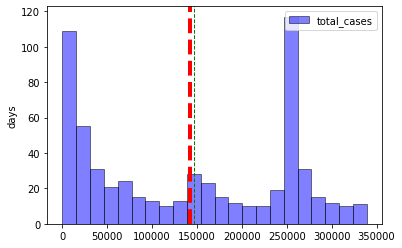

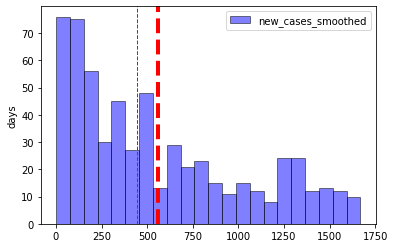

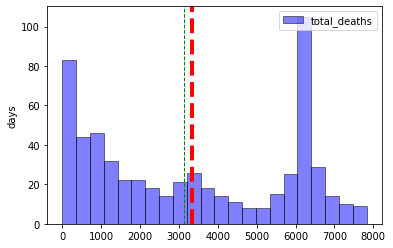

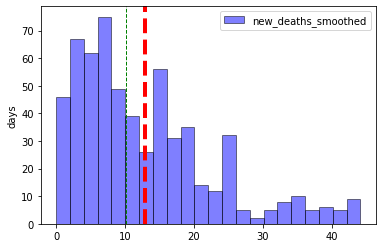

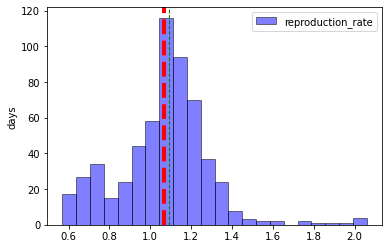

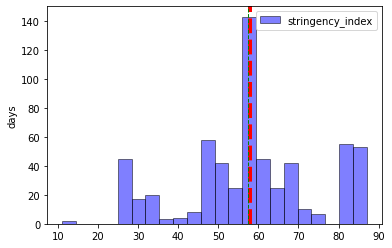

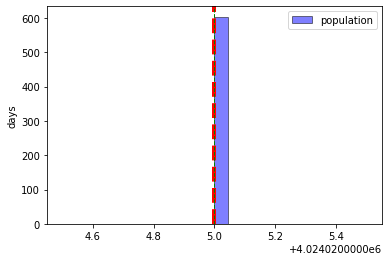

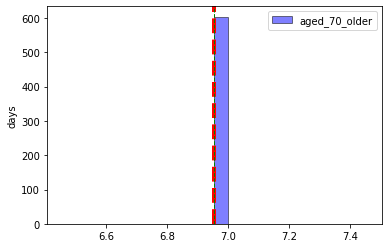

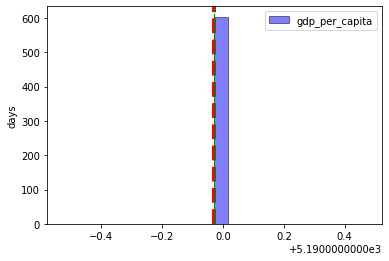

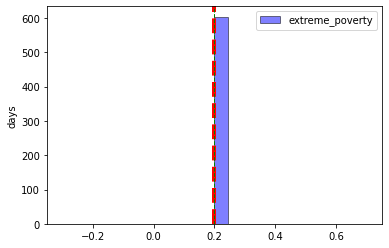

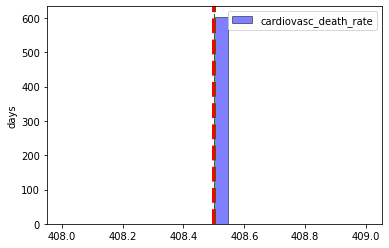

In [38]:
dataset_size = dataset.shape[0]
bins = get_bins(dataset_size)

for column in dataset.columns:
    if column in ['date', 'location']:
        continue
    plt.hist(dataset[column], bins=bins, alpha=0.5, label=column, color='blue', edgecolor='black')
    plt.axvline(dataset[column].mean(), color ='red', linewidth = 4, linestyle = 'dashed')
    plt.axvline(dataset[column].median(), color ='green', linewidth = 1, linestyle = 'dashed')
    plt.legend(loc='upper right')
    plt.ylabel('days')
    plt.show()

1. The total cases distribution is a bimodal distribution. This means that our data could be split into two groups.
2. From the new cases histogram we observe that it is not symmentric, normal distributed, it is skewed. We have a long, heavy tail to right. It appears that a lot of new cases are reported in less days, and in a lot of days there are reported less than 600 cases.
3. The total deths distribution is a bimodal distribution. This means that our data could be split into two groups.
4. The new death histogram is not normal distributed. We have a long, heavy tail to right. It looks like mostly there are around 13 deaths per day beacause of covid.
5. The reproduction rate is also not symmetric, but it is more normalized then the previous ones. We have light tails (positive kurtosis, equals to 2.7, which is almost equal with the kurtosis for normal distribution = 3.) We observe that reproduction rate, mostly is between 1 and 1.2. 
6. The stingency index is also not symmetric. Also, we could observe some outliers here. We could observe that there are around 60 government response stringency index.
7. The population, gdp, poverty, and cardiovascular death rate have the same value, normally it should change, but these values are collected ones in several years.

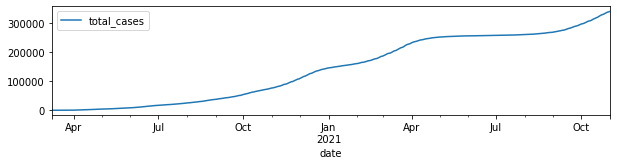

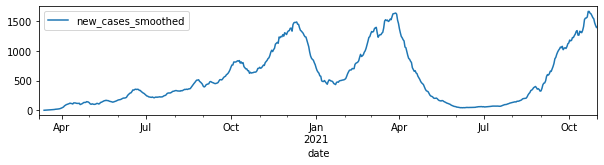

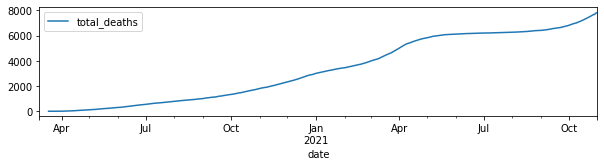

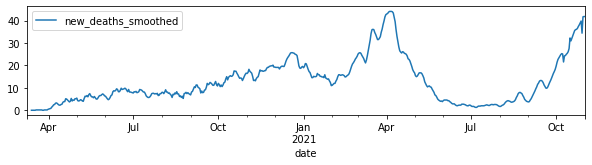

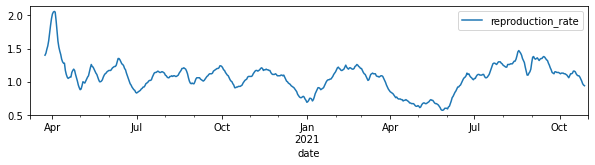

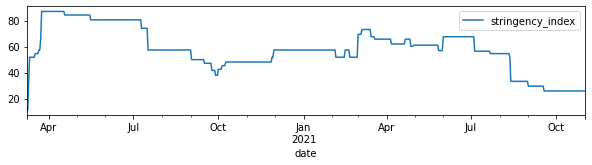

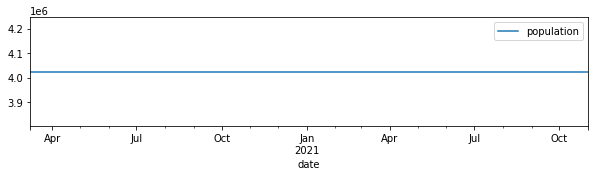

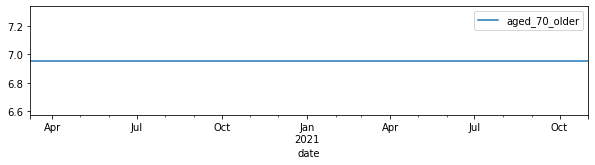

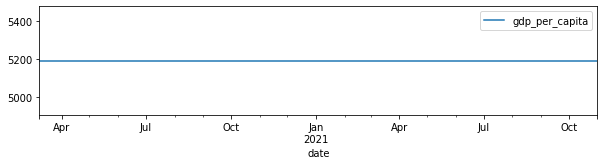

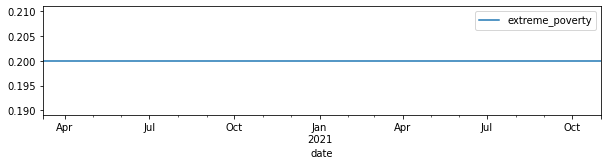

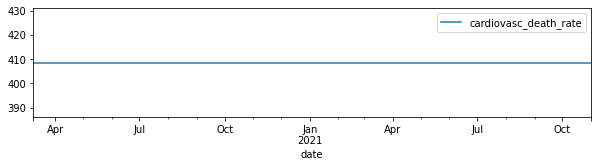

In [39]:
def plot_data_in_time():
    for column in dataset.columns:
        if column in ['date']:
            continue
        dataset.plot(kind='line', x='date', y=column, figsize=(10, 2))

plot_data_in_time()

Next, will be shown the boxplots the variables: total_cases, new_cases_smoothed, total_deaths, new_deaths_smoothed, reproduction_rate, stringency_index. Also, there are boxplots for population, aged_70_older, gdp_per_capita, extreme_poverty, cardiovascular_death_rate, but these are not relevant as these have the same value for all observations (the value does not change with time). 

Even if the variable total_cases is a cumulative one, the minimum value of it is 1 and  the maximum is 339114 cases(according to the results of the describe() method shown upper). The first 25% of observations have the values between 1 and 26526 cases. The next 25% of observations  have the values between 26526 and 146090 cases. The third quarter of observations have the values of the variable total_cases between 146090 and 255366 cases. Then the fourth quarter of observations has values from the 255366 to 339114 cases. This shows that the increase of the total number of cases is moderate. 

The boxplot for the new_cases_smoothed presents that the minimum value for the new cases in a day  is 0, and the maximum of new_cases_smoothed is almost 1650 cases. The 25% of the observations have the new_cases_smoothed variable with values between 0 and 152 cases. Then the next 25% of the observations have the new_cases_smoothed values bewteen 152 - 441 cases. The next 25% observations have the values between 441 cases and 860 cases. And the last 25% of observations have the 860 and 1669 cases.

The total_deaths variable also is a cumulative variable. It starts with is minimum value of 0 and the maximum till the last day from the data set is 7828 cases. The first 25% of observations has the values for this variable between 1 and 880 cases. The second quarter of the observations have the values for this variable between 880-3125 cases. The third quarter has the values form the 3125 - 6133 cases.And the fourth quarter has the values between 6133 cases and 7828 cases. This distribution shows that for the first  ¾ of the period the dataset is, the number of the total_deaths increases pretty fast, but then probably because of restrictions and vaccinations the number of total deaths increases slower.

The new_deaths_smoothed variable has for the first 25% of observations the value from 0 to 5. The second quarter of the observations’ values are between 5 and 10 cases. The third quarter of the observations has values from the 10 cases to the 17 cases, and the fourth quarter has values from 17 to 44 cases per day.  From the boxplot the most observations have values from 0 to 10 cases. There are some outliers for some observations the number of deaths in a day to be from 35 to 50.

About the reproduction rate that mostly the values from the observations are between 0.9 and 1.2

The stringency_index shows that mostly during the pandemic period the stringency index was between 48-65. Anyway there were periods when the stringency index was 85. Also we can observe an outlier with the value of 10. This will be replaced later.





total_cases                 AxesSubplot(0.125,0.749828;0.227941x0.130172)
new_cases_smoothed       AxesSubplot(0.398529,0.749828;0.227941x0.130172)
total_deaths             AxesSubplot(0.672059,0.749828;0.227941x0.130172)
new_deaths_smoothed         AxesSubplot(0.125,0.593621;0.227941x0.130172)
reproduction_rate        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
stringency_index         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
population                  AxesSubplot(0.125,0.437414;0.227941x0.130172)
aged_70_older            AxesSubplot(0.398529,0.437414;0.227941x0.130172)
gdp_per_capita           AxesSubplot(0.672059,0.437414;0.227941x0.130172)
extreme_poverty             AxesSubplot(0.125,0.281207;0.227941x0.130172)
cardiovasc_death_rate    AxesSubplot(0.398529,0.281207;0.227941x0.130172)
dtype: object

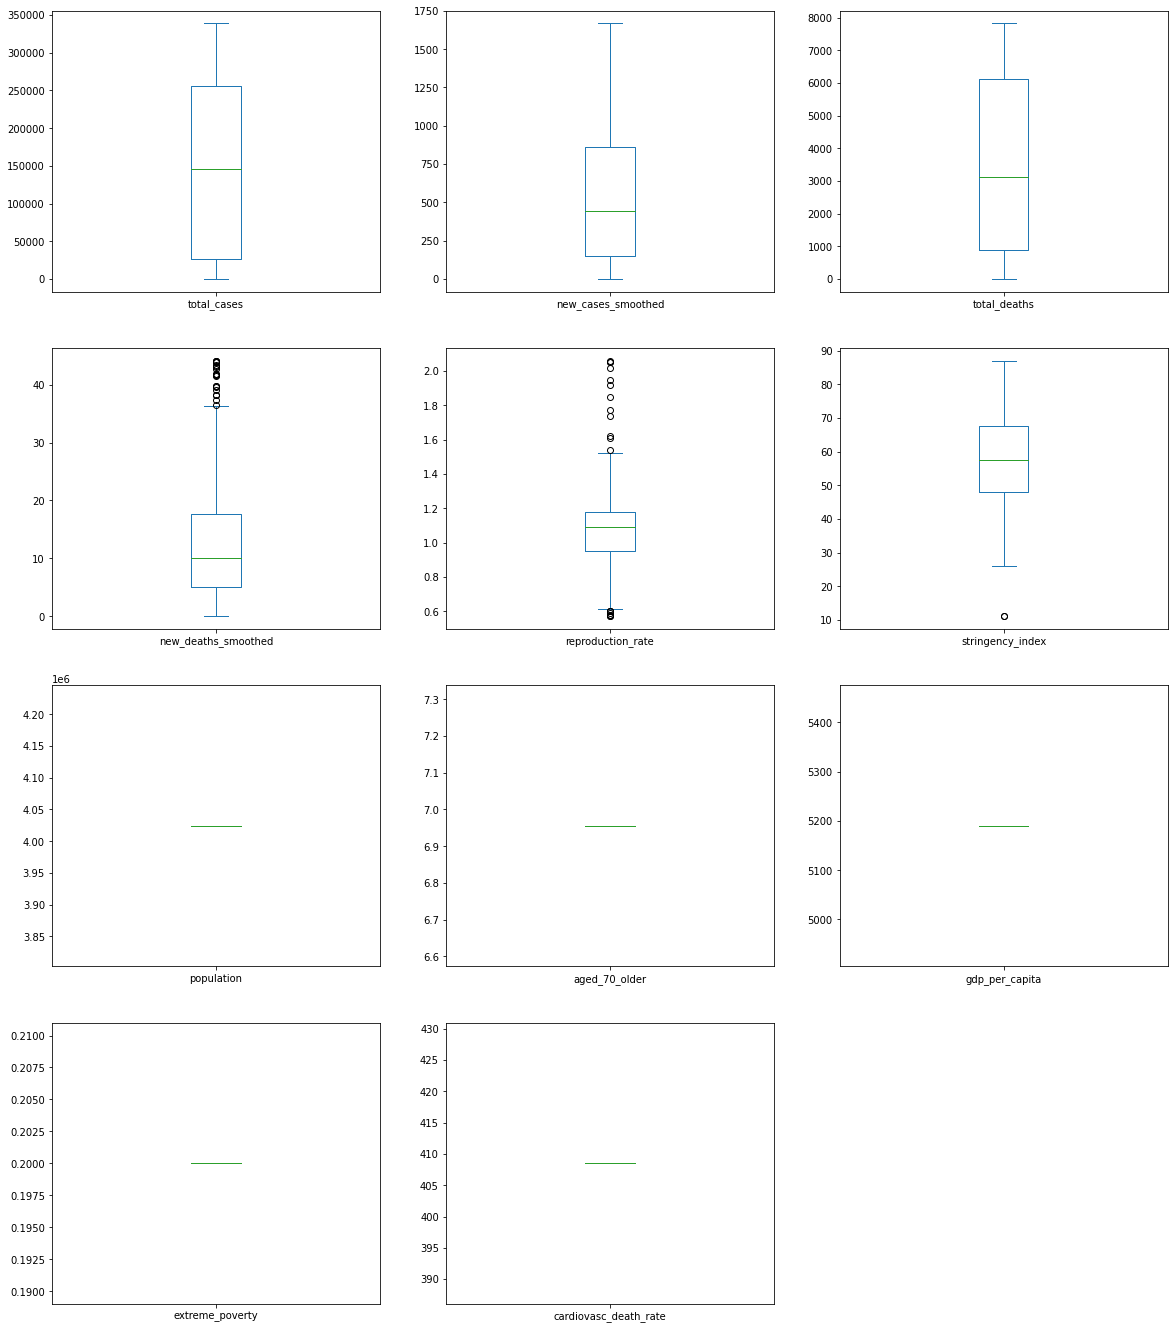

In [40]:
dataset.plot(kind='box', subplots=True, layout=(5, 3), sharex=False, sharey=False, figsize=(20, 30))

Next will be shown the correlation between variables as: total_cases, new_cases_smoothed, total_deaths, new_deaths_smoothed, reproduction_rate, stringency_index. We can observe a strong positive correlation between the variables total_cases and total_deaths. Also there is a good negative correlation between total_cases and stringency_index. 

There is a strong positive correlation between new_cases_smoothed and new_deaths_smoothed variables, this says that with more cases of COVID infected people, more people die. 

A negative correlation is detected between the total_deaths and stringency_index.

In [41]:
cols_to_plot = dataset.columns[1:6].tolist()

dataset[cols_to_plot].corr()

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,reproduction_rate
total_cases,1.000000,0.305687,0.996631,0.364098,-0.217955
new_cases_smoothed,0.305687,1.000000,0.237680,0.870519,-0.057952
total_deaths,0.996631,0.237680,1.000000,0.296062,-0.206022
new_deaths_smoothed,0.364098,0.870519,0.296062,1.000000,-0.326069
reproduction_rate,-0.217955,-0.057952,-0.206022,-0.326069,1.000000


In [42]:
dataset['new_cases_smoothed'] = dataset['new_cases_smoothed'].fillna(dataset['new_cases_smoothed'].mean())
dataset['total_deaths'] = dataset['total_deaths'].fillna(dataset['total_deaths'].mean())
dataset['new_deaths_smoothed'] = dataset['new_deaths_smoothed'].fillna(dataset['new_deaths_smoothed'].median())
dataset['reproduction_rate'] = dataset['reproduction_rate'].fillna(dataset['reproduction_rate'].mean())

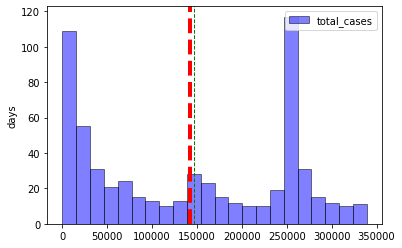

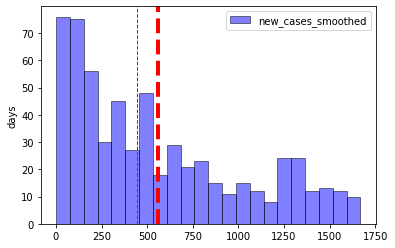

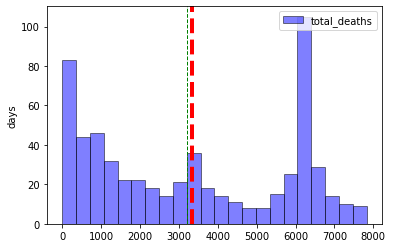

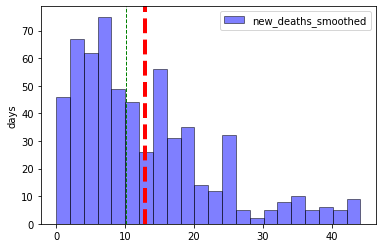

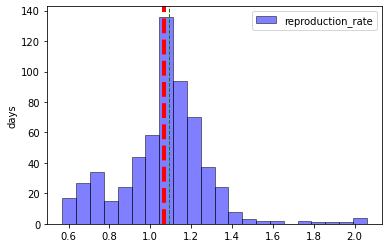

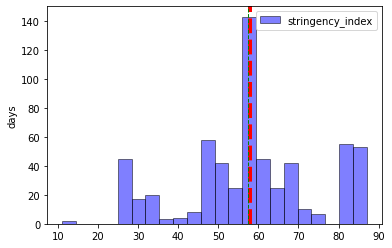

In [43]:
without = ['date', 'location','population', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate']
for column in dataset.columns:
    if column in without:
        continue
    plt.hist(dataset[column], bins=bins, alpha=0.5, label=column, color='blue', edgecolor='black')
    plt.axvline(dataset[column].mean(), color ='red', linewidth = 4, linestyle = 'dashed')
    plt.axvline(dataset[column].median(), color ='green', linewidth = 1, linestyle = 'dashed')
    plt.legend(loc='upper right')
    plt.ylabel('days')
    plt.show()